In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read and Visualize Dataset

In [83]:
from collections import Counter
def load_data(path = 'pd_speech_features.csv'):
    df = pd.read_csv(path).drop('id', axis=1)
    display(df)
    print(df.info(), Counter(df['class']))
    
    X = df.drop('class', axis=1)
    y = df['class']
    
    return X, y

# Normalize Data

In [87]:
def normilize_data(X):
    # scale data
    from sklearn.preprocessing import MinMaxScaler
    X = MinMaxScaler().fit_transform(X)
    return X

# Hanlde Imbalanced Data

In [169]:
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Oversampling
def oversample(in_data, target, sampling_strategy='minority'):
    oversample = RandomOverSampler(sampling_strategy= sampling_strategy)
    in_data_over, target_over = oversample.fit_resample(in_data, target)
    return in_data_over, target_over

# Undersampling
def undersample(in_data, target, sampling_strategy= 'majority'):
    undersample = RandomUnderSampler(sampling_strategy= sampling_strategy)
    in_data_under, target_under = undersample.fit_resample(in_data, target)
    return in_data_under, target_under

# SMOTE
def smote(in_data, target, sampling_strategy= 'minority'):
    smote = SMOTE(sampling_strategy= sampling_strategy)
    in_data_smote, target_smote = smote.fit_resample(in_data, target)
    return in_data_smote, target_smote

# Function to Handle The Method
def handle_imbalanced(in_data, target, method, sampling_strategy= 'minority'):
    if method == 'oversample':
        return oversample(in_data, target)
    elif method == 'undersample':
        return undersample(in_data, target)
    elif method == 'smote':
        return smote(in_data, target)
    else:
        return in_data, target

<h3> Test </h3>

In [66]:
balance_data, balance_target = handle_imbalanced(X, y, 'smote')
Counter(balance_target)

Counter({1: 564, 0: 564})

# Dimentionality Reduction Techniqes

In [98]:

from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# PCA

In [67]:
# PCA Function
def pca_func(in_data, n_components, whitening = False, svd_solver = 'full', plot = True):
    #draw a plot
    if plot:
        pca_base = PCA().fit(in_data)
        plt.plot(pca_base.explained_variance_ratio_)
        plt.xlabel('n_components')
        plt.ylabel('Variance')
        plt.show()
    #main PCA
    out_data = PCA(n_components = n_components, svd_solver = svd_solver, whiten = whitening).fit_transform(in_data)
    return out_data

# LDA

In [68]:
# LDA Function
def lda_func(in_data, in_target, n_components, solver = 'svd'):
    out_data = LinearDiscriminantAnalysis(n_components = n_components, solver = solver).fit_transform(in_data, in_target)
    return out_data

# ICA

In [69]:
# ICA Function
def ica_func(in_data, n_components):
    out_data = FastICA(n_components = n_components).fit_transform(in_data)
    return out_data

# AutoEncoder

Epoch 1/300
64/64 [==============================] - 0s 7ms/step - loss: 0.1148 - accuracy: 0.0177 - val_loss: 0.0588 - val_accuracy: 0.0177
Epoch 2/300
64/64 [==============================] - 0s 5ms/step - loss: 0.0652 - accuracy: 0.0217 - val_loss: 0.0515 - val_accuracy: 0.0177
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.0256 - val_loss: 0.0437 - val_accuracy: 0.0177
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0505 - accuracy: 0.0276 - val_loss: 0.0403 - val_accuracy: 0.0177
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0476 - accuracy: 0.0276 - val_loss: 0.0401 - val_accuracy: 0.0088
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0454 - accuracy: 0.0315 - val_loss: 0.0366 - val_accuracy: 0.0177
Epoch 7/300
64/64 [==============================] - 0s 6ms/step - loss: 0.0433 - accuracy: 0.0246 - val_loss: 0.0358 - val_accuracy: 0.0088
Epoch 8/300
6

Epoch 59/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.0384 - val_loss: 0.0235 - val_accuracy: 0.0265
Epoch 60/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.0404 - val_loss: 0.0231 - val_accuracy: 0.0265
Epoch 61/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.0404 - val_loss: 0.0257 - val_accuracy: 0.0265
Epoch 62/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.0433 - val_loss: 0.0229 - val_accuracy: 0.0265
Epoch 63/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.0433 - val_loss: 0.0236 - val_accuracy: 0.0177
Epoch 64/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.0424 - val_loss: 0.0242 - val_accuracy: 0.0177
Epoch 65/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.0404 - val_loss: 0.0231 - val_accuracy: 0.0265
Epoch 

64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.0433 - val_loss: 0.0218 - val_accuracy: 0.0354
Epoch 117/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.0424 - val_loss: 0.0215 - val_accuracy: 0.0354
Epoch 118/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.0433 - val_loss: 0.0219 - val_accuracy: 0.0354
Epoch 119/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.0414 - val_loss: 0.0223 - val_accuracy: 0.0354
Epoch 120/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.0424 - val_loss: 0.0213 - val_accuracy: 0.0354
Epoch 121/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.0404 - val_loss: 0.0214 - val_accuracy: 0.0354
Epoch 122/300
64/64 [==============================] - 0s 5ms/step - loss: 0.0273 - accuracy: 0.0404 - val_loss: 0.0218 - val_accuracy: 0.0354
Epoch 123/300

64/64 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.0443 - val_loss: 0.0207 - val_accuracy: 0.0177
Epoch 174/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.0473 - val_loss: 0.0207 - val_accuracy: 0.0265
Epoch 175/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.0502 - val_loss: 0.0200 - val_accuracy: 0.0354
Epoch 176/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.0463 - val_loss: 0.0201 - val_accuracy: 0.0265
Epoch 177/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.0483 - val_loss: 0.0199 - val_accuracy: 0.0265
Epoch 178/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.0532 - val_loss: 0.0202 - val_accuracy: 0.0265
Epoch 179/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.0502 - val_loss: 0.0203 - val_accuracy: 0.0177
Epoch 180/300

64/64 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.0552 - val_loss: 0.0195 - val_accuracy: 0.0354
Epoch 231/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.0581 - val_loss: 0.0201 - val_accuracy: 0.0265
Epoch 232/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.0542 - val_loss: 0.0194 - val_accuracy: 0.0354
Epoch 233/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.0581 - val_loss: 0.0192 - val_accuracy: 0.0354
Epoch 234/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.0542 - val_loss: 0.0199 - val_accuracy: 0.0354
Epoch 235/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.0562 - val_loss: 0.0191 - val_accuracy: 0.0442
Epoch 236/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.0571 - val_loss: 0.0196 - val_accuracy: 0.0442
Epoch 237/300

64/64 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.0631 - val_loss: 0.0190 - val_accuracy: 0.0354
Epoch 288/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.0591 - val_loss: 0.0200 - val_accuracy: 0.0354
Epoch 289/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.0591 - val_loss: 0.0187 - val_accuracy: 0.0354
Epoch 290/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.0631 - val_loss: 0.0194 - val_accuracy: 0.0354
Epoch 291/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.0621 - val_loss: 0.0193 - val_accuracy: 0.0354
Epoch 292/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.0631 - val_loss: 0.0184 - val_accuracy: 0.0354
Epoch 293/300
64/64 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.0631 - val_loss: 0.0189 - val_accuracy: 0.0354
Epoch 294/300

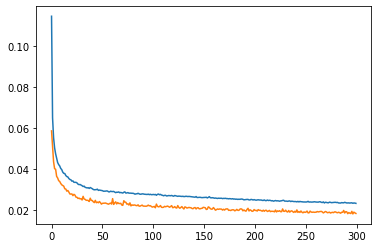

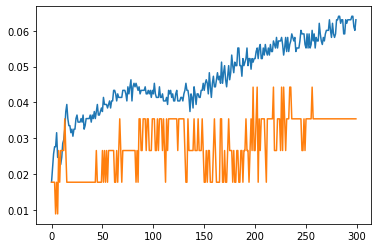

(          0         1         2         3         4         5         6    \
 0    0.998915  0.922465  0.536514  0.539668  0.255824  0.251821  0.544856   
 1    0.999242  0.919320  0.562400  0.492529  0.258144  0.255682  0.562533   
 2    0.999065  0.908250  0.457159  0.602322  0.245868  0.241458  0.589049   
 3    0.989973  0.374943  0.778346  0.733983  0.163829  0.159629  0.724788   
 4   -0.051846  0.423783  0.819495  0.658549  0.221633  0.217478  0.590630   
 ..        ...       ...       ...       ...       ...       ...       ...   
 751 -0.057241  0.959133  0.072455  0.134875  0.459080  0.456522  0.224515   
 752  0.045654  0.693847  0.063322  0.506772  0.398667  0.393929  0.337410   
 753 -0.016854  0.882963  0.575130  0.279986  0.413091  0.409780  0.273414   
 754 -0.059465  0.885401  0.670559  0.397276  0.372936  0.370277  0.334912   
 755  0.040375  0.939237  0.745015  0.363971  0.385752  0.382147  0.321641   
 
           7         8         9    ...       743       744   

In [70]:
def auto_encoder(x_train):
    from keras.layers import Dense, Input, Dropout, BatchNormalization
    from keras.models import Sequential
    from keras.optimizers import SGD, Adam

    # create the autoencoder.
    model = Sequential()
    # add input layer
    model.add(Input((x_train.shape[1],)))

    # add the encoding layer.
    model.add(Dense(250, activation='relu')) # Number of PC (PCA) to include 99% variance of data 
#     model.add(Dense(100, activation='relu')) # Number of PC (PCA) to include 90% variance of PCA_DATA 
    
    # bottle neck of auto encoder
    model.add(Dense(80, activation='relu')) 
    
    # add the decoding layer
#     model.add(Dense(100, activation='relu')) 
    model.add(Dense(250, activation='relu'))
    
    # add the output layer.
    model.add(Dense(x_train.shape[1], activation='tanh'))

    number_of_epochs = 300; lr = 0.001
    opt = Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='mae', metrics=['accuracy'])
    history = model.fit(x_train, x_train, epochs=number_of_epochs, batch_size=16, validation_split=0.1)
    
    params = history.history
    plt.plot(range(number_of_epochs), params['loss'])
    plt.plot(range(number_of_epochs), params['val_loss'])
    plt.show()
    plt.plot(range(number_of_epochs), params['accuracy'])
    plt.plot(range(number_of_epochs), params['val_accuracy'])
    plt.show()
    
    out_data = model.predict(X)
    return out_data
    
temp = auto_encoder(balance_data)    
pd.DataFrame(temp), len(temp)

# Sequential Backward Feature Elimination

In [71]:
def sbf(in_data, target, n_component):
    from mlxtend.feature_selection import SequentialFeatureSelector as sfs
    from sklearn.neighbors import KNeighborsClassifier

    number_of_features = n_component
    sfs1=sfs(KNeighborsClassifier(n_neighbors=3),k_features=number_of_features, forward=False,
             floating=False, verbose=3, scoring='roc_auc', cv=3)
    sfs1=sfs1.fit(in_data, target)

    print('\nSequential Forward Floating Selection (k=3):')
    print(sffs.k_feature_idx_)
    print('CV Score:')
    print(sffs.k_score_)
    
    return

# Dimentional Reduction Techniqe

In [267]:
def dimention_reduction(in_data, in_target, method, n_components = None, whitening = False, plot = False):
    if method == 'PCA':
        return pca_func(in_data, n_components, whitening = whitening, svd_solver = 'full', plot = plot)
    elif method == 'LDA':
        return lda_func(in_data, in_target, 1, solver = 'svd')
    elif method == 'ICA':
        return ica_func(in_data, n_components)
    elif method == 'autoencoder':
        return auto_encoder(in_data)
    elif method == 'sbf':
        return sbf(in_data, target, n_component)
    else:
        return in_data

# Discriminative Classifiers

# Split to train and test

In [82]:
from sklearn.model_selection import train_test_split
def split_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    print('Test Data ', Counter(y_test), 'Train Data ', Counter(y_train))
    return X_train, X_test, y_train, y_test

# Logistic Regression

In [75]:
def logistic(X_train, X_test, y_train):
    from sklearn.linear_model import LogisticRegression

    clf = LogisticRegression(C=100, max_iter=1000)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    return clf, y_pred

# _, y_pred = logistic(X_train, X_test, y_train)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred, target_names=['0', '1']))

# SVM

In [114]:
def svm(X_train, X_test, y_train):
    from sklearn.svm import SVC

    clf = SVC(C=1, kernel='poly', degree=5)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    return clf, y_pred

# _, y_pred = svc(X_train, X_test, y_train)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred, target_names=['0', '1']))

# Decision Tree

In [148]:
def tree(X_train, X_test, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    return clf, y_pred

# _, y_pred = tree(X_train, X_test, y_train)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred, target_names=['0', '1']))

# K Nearest Neighbor

In [78]:
def knn(X_train, X_test, y_train):
    from sklearn.neighbors import KNeighborsClassifier

    clf = KNeighborsClassifier(n_neighbors=2)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    return clf, y_pred

# _, y_pred = tree(X_train, X_test, y_train)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred, target_names=['0', '1']))

# Multi Layer Perceptron

In [160]:
def mlp(X_train, X_test, y_train, y_test):
    from keras.layers import Dense, Input, Dropout
    from keras.models import Sequential
    from keras.optimizers import SGD, Adam
    from keras.utils import to_categorical
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    # create the autoencoder.
    model = Sequential()
    # add input layer
    model.add(Input((X_train.shape[1],)))

    # add the encoding layer.
    model.add(Dense(50, activation='relu')) # Number of PC (PCA) to include 99% variance of data 
    model.add(Dense(10, activation='relu')) # Number of PC (PCA) to include 90% variance of PCA_DATA 
    model.add(Dropout(0.5))
    
    # add the output layer.
    model.add(Dense(2, activation='softmax'))

    number_of_epochs = 20; lr = 0.001
    model.compile(optimizer=Adam(learning_rate=lr), loss='BinaryCrossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=1, validation_data=(X_test, y_test))
    
    params = history.history
    plt.plot(range(number_of_epochs), params['loss'])
    plt.plot(range(number_of_epochs), params['val_loss'])
    plt.title('loss')
    plt.show()
    plt.plot(range(number_of_epochs), params['accuracy'])
    plt.plot(range(number_of_epochs), params['val_accuracy'])
    plt.title('accuracy')
    plt.show()
    
    y_pred = model.predict(X_test)
    return model, y_pred
    
# _, y_pred = mlp(X_train, X_test, y_train, y_test)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred, target_names=['0', '1']))

# RBF

In [286]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)
    
import pandas as pd
import numpy as np

def rbf(X_train, X_test, y_train, y_test):

    from keras.layers import Dense, Flatten, Input
    from keras.models import Sequential
    from keras.losses import binary_crossentropy
    from keras.utils import to_categorical
    
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(RBFLayer(10, 0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, batch_size=1, epochs=10, validation_data=(X_test, y_test))

    params = history.history
    plt.plot(range(10), params['loss'])
    plt.plot(range(10), params['val_loss'])
    plt.title('loss')
    plt.show()
    plt.plot(range(10), params['accuracy'])
    plt.plot(range(10), params['val_accuracy'])
    plt.title('accuracy')
    plt.show()
    
    y_pred = model.predict(X_test)
    
    return model, y_pred

# Discriminative Function

In [281]:
def discriminative_method(X_train, X_test, y_train, y_test, method):
    if method == 'logistic':
        return logistic(X_train, X_test, y_train)
    elif method == 'svm':
        return svm(X_train, X_test, y_train)
    elif method == 'tree':
        return tree(X_train, X_test, y_train)
    elif method == 'knn':
        return knn(X_train, X_test, y_train)
    elif method == 'mlp':
        return mlp(X_train, X_test, y_train, y_test)
    elif method == 'rbf':
        return rbf(X_train, X_test, y_train, y_test)

# Generative Classifiers

# Gaussian Mixure Model

In [255]:
# GMM Model
from sklearn.mixture import GaussianMixture
def gmm_classifier(X_train, X_test, y_train, components = 2, covariance_type = 'full'):
    clf = GaussianMixture(n_components=components, covariance_type = covariance_type)
    clf.fit(X_train)
    y_pred = clf.predict(X_test)
    
    return clf, y_pred


# Parzen Bayes

In [291]:
import numpy as np


class NaiveBayesClassifier:
    """
    A Naive Bayes Classifier using Kernel Density Estimation with Parzen windows.
    The classifier implements two kernels for parzen window  - Radial and Hypercube
    It also implements Single bandwidth model and class-specific Multi bandwidth model
    The kernel and model type are passed as arguments to class object initialization.
    Along with the number of bandwidths necessary, in case of Multi bandwidth model.
    """

    def __init__(self, bandwidth=1, kernel='radial', multi_bw=False):
        """
        Initialize the classifier with proper parameters.
        :param bandwidth: An integer giving the number of bandwidths necessary
        :param kernel: A string specifying the kernel to be used for the model
        :param multi_bw: A boolean variable specifying if the Multi bandwidth
                        model is to be used.
                        By default Single bandwidth model is selected.
        """
        self.priors = dict()
        self.dim = 1
        self.multi_bw = multi_bw
        self.bandwidth = bandwidth
        if kernel == "radial":
            self.kernel = self.radial
        elif kernel == "hypercube":
            self.kernel = self.hypercube

    def hypercube(self, k):
        """
        Hypercube kernel for Density Estimation.
        """
        return np.all(k < 0.5, axis=1)

    def radial(self, k):
        """
        Radial Kernel for Density estimation.
        """
        const_part = (2 * np.pi) ** (-self.dim / 2)
        return const_part * np.exp(-0.5 * np.add.reduce(k ** 2, axis=1))

    def parzen_estimation(self, h, x, x_train):
        """
        Density estimation for a single sample against the training set with
        parzen window using the specified bandwidth, kernel.
        :param h: An integer value giving the bandwidth to be used for the class.
        :param x: A single input sample, whose density needs to be estimated.
        :param x_train: Array of input data to calculate KDE value against.
        :return: A single float value giving the density of the function at the given point.
        """
        N = x_train.shape[0]
        dim = self.dim
        k = np.abs(x - x_train) * 1.0 / h
        summation = np.add.reduce(self.kernel(k))
        return summation / (N * (h ** dim))

    def KDE(self, h, x_test, x_train):
        """
        Kernel Density Estimation based on the parameters set.
        :param h: An integer value giving the bandwidth to be used for the class.
        :param x_test: Array of input data to make predictions.
        :param x_train: Array of input data to calculate KDE value against.
        :return: A list of floats giving the density estimation values for each
                 row in x_test, x_test[i] calculated against the training set, previously set
        """
        P_x = np.zeros(len(x_test))
        N = x_train.shape[0]
        dim = self.dim
        for i in range(len(x_test)):
            P_x[i] = self.parzen_estimation(h, x_test[i], x_train)

        return P_x

    def fit(self, X, Y):
        """
        Fits the model to the training set.
        Since KDE is a lazy learner we just need to save the necessary information.
        :param X: Array of input data
        :param Y: Array of output labels
        :return: None
        """
        self.x_train = X
        self.y_train = Y
        self.dim = X.shape[1]
        labels = set(Y)
        for c in labels:
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def predict(self, x_test):
        """
        Predict the labels of testing set, using KDE.
        :param x_test: Array of input data to make predictions.
        :return: Predicted labels of the data.
        """
        N, D = x_test.shape
        priors = self.priors
        K = len(priors)
        P = np.zeros((N, K))
        x_train = self.x_train
        y_train = self.y_train
        if self.multi_bw:
            bw = self.bandwidth
        else:
            bw = np.repeat(self.bandwidth, K)
        for c, p in priors.items():
            P[:, int(c)] = self.KDE(bw[int(c)], x_test, x_train[y_train == c]) * p

        pred_y = np.argmax(P, axis=1)
        self.pred_y = pred_y

        return pred_y

    def accuracy(self, y_test):
        """
        Calculates the accuracy between the predicted label and actual labels.
        :param y_test: Array of actual output labels of Testing set.
        :return: A float value giving the accuracy.
        """
        pred_y = self.pred_y
        return np.array([pred_y == y_test]).mean()

    def score(self, x_test, y_test):
        """
        Function that runs both Predict and Accuracy and returns the accuracy
        score of the model.
        :param x_test: Array of input data to make predictions.
        :param y_test: Array of actual output labels of Testing set.
        :return: A float value giving the accuracy of the model.
        """
        self.predict(x_test)
        return self.accuracy(y_test)
    
def BC_Parzen(x_train, y_train, x_test):
    print(x_train)
    nbmodel = NaiveBayesClassifier(bandwidth=1,kernel='hypercube')
    nbmodel.fit(np.array(x_train), np.array(y_train))
    pre = nbmodel.predict(np.array(x_test))
    pre = pd.DataFrame(pre)
    return nbmodel, pre

# KNN Bayes

In [295]:
import numpy as np


class NaiveBayesClassifier_KNN_Base:
    """
    A Naive Bayes Classifier using Kernel Density Estimation with Parzen windows.
    The classifier implements two kernels for parzen window  - Radial and Hypercube
    It also implements Single bandwidth model and class-specific Multi bandwidth model
    The kernel and model type are passed as arguments to class object initialization.
    Along with the number of bandwidths necessary, in case of Multi bandwidth model.
    """

    def __init__(self, bandwidth=1, kernel='radial', multi_bw=False):
        """
        Initialize the classifier with proper parameters.
        :param bandwidth: An integer giving the number of bandwidths necessary
        :param kernel: A string specifying the kernel to be used for the model
        :param multi_bw: A boolean variable specifying if the Multi bandwidth
                        model is to be used.
                        By default Single bandwidth model is selected.
        """
        self.priors = dict()
        self.dim = 1
        self.multi_bw = multi_bw
        self.bandwidth = bandwidth
        if kernel == "radial":
            self.kernel = self.radial
        elif kernel == "hypercube":
            self.kernel = self.hypercube

    def hypercube(self, k):
        """
        Hypercube kernel for Density Estimation.
        """
        return np.all(k < 0.5, axis=1)

    def radial(self, k):
        """
        Radial Kernel for Density estimation.
        """
        const_part = (2 * np.pi) ** (-self.dim / 2)
        return const_part * np.exp(-0.5 * np.add.reduce(k ** 2, axis=1))

    def area(data):
        size = 40
        X = []
        for i in range(data.shape[1]):
            x=np.linspace(-4, 4, size)
            X.append(x)
        return np.array(X)    


    def knn(data, k):
        X = area(data)
        size = [len(X[0]), len(X[1])]
        knnpdf = np.zeros(size)
        for i in range(size[0]):
            for j in range(size[1]):
                x = np.array([X[0][i],X[1][j]])
                ds = [np.linalg.norm(x-y) for y in data]
                ds.sort()
                v = math.pi*ds[k-1]*ds[k-1]
                if v == 0:
                    knnpdf[i,j] = 1
                else:
                    knnpdf[i,j] = k/(n*v)
        return knnpdf

    # def parzen_estimation(self, h, x, x_train):
    #     """
    #     Density estimation for a single sample against the training set with
    #     parzen window using the specified bandwidth, kernel.
    #     :param h: An integer value giving the bandwidth to be used for the class.
    #     :param x: A single input sample, whose density needs to be estimated.
    #     :param x_train: Array of input data to calculate KDE value against.
    #     :return: A single float value giving the density of the function at the given point.
    #     """
    #     N = x_train.shape[0]
    #     dim = self.dim
    #     k = np.abs(x - x_train) * 1.0 / h
    #     summation = np.add.reduce(self.kernel(k))
    #     return summation / (N * (h ** dim))

    # def KDE(self, h, x_test, x_train):
    #     """
    #     Kernel Density Estimation based on the parameters set.
    #     :param h: An integer value giving the bandwidth to be used for the class.
    #     :param x_test: Array of input data to make predictions.
    #     :param x_train: Array of input data to calculate KDE value against.
    #     :return: A list of floats giving the density estimation values for each
    #              row in x_test, x_test[i] calculated against the training set, previously set
    #     """
    #     P_x = np.zeros(len(x_test))
    #     N = x_train.shape[0]
    #     dim = self.dim
    #     for i in range(len(x_test)):
    #         P_x[i] = self.parzen_estimation(h, x_test[i], x_train)

    #     return P_x

    def fit(self, X, Y):
        """
        Fits the model to the training set.
        Since KDE is a lazy learner we just need to save the necessary information.
        :param X: Array of input data
        :param Y: Array of output labels
        :return: None
        """
        self.x_train = X
        self.y_train = Y
        self.dim = X.shape[1]
        labels = set(Y)
        for c in labels:
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def predict(self, x_test):
        """
        Predict the labels of testing set, using KDE.
        :param x_test: Array of input data to make predictions.
        :return: Predicted labels of the data.
        """
        N, D = x_test.shape
        priors = self.priors
        K = len(priors)
        P = np.zeros((N, K))
        x_train = self.x_train
        y_train = self.y_train
        if self.multi_bw:
            bw = self.bandwidth
        else:
            bw = np.repeat(self.bandwidth, K)
        for c, p in priors.items():
            P[:, int(c)] = self.knn(k, x_test, x_train[y_train == c]) * p

        pred_y = np.argmax(P, axis=1)
        self.pred_y = pred_y

        return pred_y

    def accuracy(self, y_test):
        """
        Calculates the accuracy between the predicted label and actual labels.
        :param y_test: Array of actual output labels of Testing set.
        :return: A float value giving the accuracy.
        """
        pred_y = self.pred_y
        return np.array([pred_y == y_test]).mean()

    def score(self, x_test, y_test):
        """
        Function that runs both Predict and Accuracy and returns the accuracy
        score of the model.
        :param x_test: Array of input data to make predictions.
        :param y_test: Array of actual output labels of Testing set.
        :return: A float value giving the accuracy of the model.
        """
        self.predict(x_test)
        return self.accuracy(y_test)

# Ensamlbe Classifers

# Bagging

In [227]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
def bagging(X_train, X_test, y_train, estimator=SVC(), n_estimators=10):
    clf = BaggingClassifier(base_estimator=estimator, n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    return clf, y_pred

# Random Forest

In [234]:
from sklearn.ensemble import RandomForestClassifier
def forest(X_train, X_test, y_train, n_estimators=100, max_depth=5):
    clf = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    return clf, y_pred

# Adaboost

In [225]:
from sklearn.ensemble import AdaBoostClassifier
def boost(X_train, X_test, y_train, n_estimators=100):
    clf = AdaBoostClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    return clf, y_pred


# Voting

In [224]:
from sklearn.ensemble import VotingClassifier
def voting(X_train, X_test, y_train, estimators, voting='hard'):
    clf = VotingClassifier(estimators=estimators, voting=voting)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    return clf, y_pred


# Ensamble Model

In [215]:

from sklearn.tree import DecisionTreeClassifier
def ensemble_model(X_train, X_test, y_train, method, estimator=SVC(), n_estimators=100, estimators=[], max_depth=5):
    if method == 'bagging':
        return bagging(X_train, X_test, y_train, estimator=estimator, n_estimators=10)
    elif method == 'forest':
        return forest(X_train, X_test, y_train, n_estimators=n_estimators, max_depth=max_depth)
    elif method == 'boost':
        return boost(X_train, X_test, y_train, n_estimators=n_estimators)
    elif method == 'voting':
        return voting(X_train, X_test, y_train, estimators, voting='hard')
    else:
        raise 

# Evaluation Parameters

In [287]:
from sklearn.metrics import classification_report, plot_roc_curve, roc_curve, auc, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
def classification_reports(x_train, X_test, y_train, y_pred, y_test, model, target_names=['0', '1'], cv=5):
    # Train Accuracy
    print('Train accuracy on Train data is: ', accuracy_score(y_train, model.predict(x_train)))
    
    # Accuracy, precision, Recall, and F1-Score
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # Cross Validation Score
    scores = cross_val_score(model, x_train, y_train, cv=cv)
    print("%0.2f accuracy with a standard deviation of %0.2f with Cross Validation" % (scores.mean(), scores.std()))
    
    # Roc Curve
    plot_roc_curve(model, X_test, y_test)
    plt.show()
    
    # Area Under ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    print('Area under the ROC curve is : ', auc(fpr, tpr))
    
    plot_confusion_matrix(model, X_test, y_test)

# Run methods

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


Load Data: 


,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.3 MB
None Counter({1: 564, 0: 192})

Normilize Data: 

Dimentional Reduction: 


,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,-1.339397,-0.558285,-1.002495,-0.157676,-0.213265,-0.243279,0.212460,-0.493192,-0.061899,0.053725,...,-0.026636,-0.008193,-0.117116,-0.041140,-0.044986,-0.016053,-0.058132,-0.017714,0.000768,0.049666
1,-1.450711,-0.493887,-1.106028,0.170330,-0.217101,-0.205296,0.228974,-0.385226,0.329423,-0.227700,...,0.079149,0.025625,0.070407,0.001571,0.071202,-0.011807,-0.017480,0.005554,-0.156249,-0.021781
2,-1.923121,-0.177777,-0.940145,0.251750,-0.136722,-0.543182,0.291437,-0.460222,-0.158691,0.114233,...,0.012915,-0.005679,-0.114578,-0.059765,0.084565,-0.034148,-0.051747,0.113740,-0.045294,0.015596
3,-0.379726,-1.763046,1.825072,-0.445533,-1.132919,0.672383,-1.663618,-0.479242,0.216811,-0.263052,...,-0.075131,-0.132755,-0.097237,0.043989,-0.137158,0.002735,-0.106942,-0.009666,0.094749,-0.095522
4,-0.155739,-1.186710,1.922939,-0.795982,-1.262255,0.876244,-1.479921,-0.593400,-0.001184,-0.091413,...,0.005393,0.169948,0.112602,0.050603,0.064056,0.050452,-0.056014,-0.061351,0.050649,-0.021486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,3.325712,-0.102974,-0.077957,1.445495,-0.808284,-1.123834,-0.501540,0.611596,0.619795,-0.239251,...,-0.218928,0.128203,0.094809,-0.163980,0.129897,0.112412,-0.188272,-0.054158,0.131110,-0.078327
752,2.169707,0.244748,1.182231,1.732952,-0.680034,-0.403690,-0.615912,0.184044,-0.282782,-0.550383,...,0.250667,0.138780,0.113890,-0.016317,0.199461,0.049861,0.225782,-0.016176,0.150459,-0.054839
753,1.203056,-0.043257,-0.011547,-0.673853,-0.147413,-0.369289,-0.020674,-0.045992,0.535601,-0.084465,...,-0.017337,0.115875,0.033992,-0.040753,-0.003842,0.051217,0.046853,-0.107646,0.057116,-0.039392
754,0.787112,-0.627686,0.101777,-0.850750,0.022926,-0.505056,-0.439549,-0.205641,0.244467,-0.331640,...,0.037253,0.046011,0.097694,0.074441,0.085136,0.048345,0.005308,0.143496,0.005923,-0.057061



Train Test Split
Test Data  Counter({1: 169, 0: 58}) Train Data  Counter({1: 395, 0: 134})

Handle Imbalance Data: 
After Handling Imbalaced Data:  Counter({1: 395, 0: 395})
Train accuracy on Train data is:  1.0
              precision    recall  f1-score   support

           0       0.47      0.48      0.47        58
           1       0.82      0.81      0.82       169

    accuracy                           0.73       227
   macro avg       0.64      0.65      0.65       227
weighted avg       0.73      0.73      0.73       227

0.82 accuracy with a standard deviation of 0.02 with Cross Validation


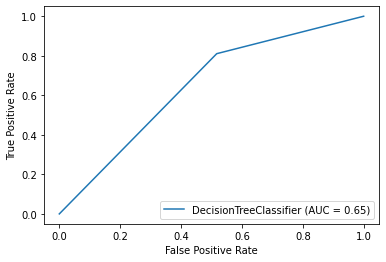

Area under the ROC curve is :  0.6467047541318098


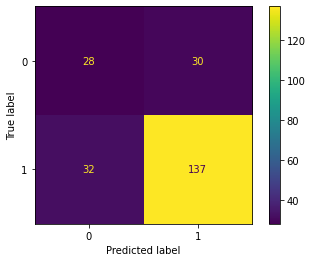

In [290]:
def run():
    print('\nLoad Data: ')
    X, y = load_data()
    print('\nNormilize Data: ')
    X = normilize_data(X)

    print('\nDimentional Reduction: ')
    X_low_dim = dimention_reduction(X, y, 'PCA', n_components = 131, whitening =False, plot = False) # PCA, LDA, ICA, autoencoder, sbf
    display(pd.DataFrame(X_low_dim))

    print('\nTrain Test Split')
    X_train, X_test, y_train, y_test = split_train_test(X_low_dim, y)


    print('\nHandle Imbalance Data: ')
    X_train, y_train = handle_imbalanced(X_train, y_train, 'smote', sampling_strategy= 'minority') # smote, oversample, undersample
    print('After Handling Imbalaced Data: ',Counter(y_train))
    
    model , y_pred = discriminative_method(X_train, X_test, y_train, y_test, 'tree') # logistic, svm, tree, knn, mlp, rbf
#     model , y_pred = ensemble_model(X_train, X_test, y_train, 'boost', estimator=DecisionTreeClassifier(), n_estimators=100, estimators=eclf1, max_depth=5)
#     model , y_pred = gmm_classifier(X_train, X_test, y_train)
    
    classification_reports(X_train, X_test, y_train, y_pred, y_test, model, target_names=['0', '1'], cv=5)
    
run()

In [95]:
def run(dimention_method, n_components, whitening, classifier_method):
    X,y = load_data()
    X = normlize_data(X)

    X_low_dim = dimention_reduction(X, y, dimention_method, n_components = n_components, whitening = whitening, plot = True)

    X_train, X_test, y_train, y_test = split_train_test(X_low_dim, y)

    model , y_pred = discriminative_method(X_train, X_test, y_train, y_test, classifier_method)

    classification_reports(x_train, y_train, y_pred, y_test, model, target_names=['0', '1'], cv=5)